In [1]:
from CF_methods import *

# Test plot

In [2]:
Large_font_size = 12
Medium_font_size = 7
Small_font_size = 5
lw = 0.5
text_kwargs = dict(ha='center', va='center', color='C1')

#setting figuresize - by default matplotlib uses inches
#size of A4 sheet - 
cm_ = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(3*cm_, 2*cm_))
#ax.text(0.5, 1.5, f'Max font : {Large_font_size}pt', fontsize = Large_font_size, **text_kwargs)
#ax.text(0.5, 1.0, f'Med font : {Medium_font_size}pt', fontsize = Medium_font_size, **text_kwargs)
#ax.text(0.5, 0.5, f'Small font : {Small_font_size}pt', fontsize = Small_font_size, **text_kwargs)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel(r"$K_b^*$", fontsize = Medium_font_size, rotation = 0)
ax.set_xlabel("g", fontsize = Medium_font_size)

os.makedirs("plots", exist_ok=True)

fig.savefig("plots/test.pdf", bbox_inches = "tight")

# Import data
Import all the csv files available in `CephalicFurrow_theory/simulation_data/WT_K_1e-4`

In [3]:
global_path_to_repo = "/Users/krishna/PhD/CephalicFurrow_theory/"
path_to_dfs = global_path_to_repo + "simulation_data/WT_K_1e-4/dfs/"

group_K_g = pd.read_csv(path_to_dfs + "avg_prop_over_K_and_g_combination.csv")
grouped_df = pd.read_csv(path_to_dfs + "avg_prop_over_each_sim.csv")
df_energy_all = pd.read_csv(path_to_dfs + 'combined_energy.csv')
grouped_energy_df = pd.read_csv(path_to_dfs + "grouped_energy_df.csv")
mean_shape_at_maxBendEnergy = pd.read_csv(path_to_dfs + "mean_depth_along_curve_at_maxBendEnergy_afterMD.csv")
allSims_at_maxBendEnergy = pd.read_csv(path_to_dfs + "allSims_at_maxBendEnergy_aferMD.csv")


In [40]:
def helper_plot_avg_depth(ax, df, xname, yname, yname_std = None, xlim = None, ylim = None, lw = 1,
                            title = None, yticks = None, yticklabels = None, xticks = None, xticklabels = None, set_xscale_log = False,
                            axvline_xloc = None, axvline_color = "blue",
                            xlabel = None,ylabel = None, plotMD = True, plotCF = True,
                           ):
    if xlim is not None : ax.set_xlim(xlim)
    if ylim is not None : ax.set_ylim(ylim)
    ax.plot(df[xname], df[yname],color = "black", lw = lw)   
    if yname_std is not None:
        ax.fill_between(df[xname], 
                df[yname] - df[yname_std],
                df[yname] + df[yname_std],
                alpha = 0.5, color = "gray", linewidth = 0,
               )
    if title is not None: ax.set_title(title, fontsize = Small_font_size)
    if set_xscale_log: ax.set_xscale("log")
    if yticks is not None: ax.set_yticks(yticks)
    if yticklabels is not None: ax.set_yticklabels(yticklabels, fontsize = Small_font_size)
    if xticks is not None: ax.set_xticks(xticks)
    if xticklabels is not None: ax.set_xticklabels(xticklabels, fontsize = Small_font_size)
    if xlabel is not None: ax.set_xlabel(xlabel, fontsize = Small_font_size, labelpad = 0)
    if ylabel is not None: ax.set_ylabel(ylabel, fontsize = Small_font_size, labelpad = 0, rotation = 0)
        
    if plotMD:
        md_locations = [(0.1,0.15), (0.2,0.25), (0.3,0.35), (0.4, 0.45)]
        for md_location in md_locations:
            ax.axvspan(md_location[0], md_location[1], facecolor=MD_color, alpha=0.4)
    if plotCF:
        ax.axvspan(0.36, 0.38, facecolor=CF_color, alpha=0.4)
        
    ax.tick_params(axis='both', which='major', length=Small_font_size/5, pad = 0, labelsize = Small_font_size)
        
    if axvline_xloc is not None: ax.axvline(x = axvline_xloc, color = axvline_color, lw = lw, linestyle = '--')
    
    return(ax)

# Compare the depth along the curve 
Between CF mutant, and WT with and without t_MD

In [5]:
#load CF mutant data
mean_shape_at_maxBendEnergy_CFM = pd.read_csv(global_path_to_repo + "simulation_data/CF_mutant/dfs/mean_depth_along_curve_at_maxBendEnergy.csv")
allSims_at_maxBendEnergy_CFM = pd.read_csv(global_path_to_repo + "simulation_data/CF_mutant/dfs/allSims_at_maxBendEnergy.csv")


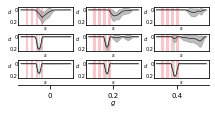

In [6]:
# Average depth
%matplotlib inline
#we will need to do this plot for different values of t_MD

K = 1e-4 #np.unique(df_mean_shape["K"])[0]
MD_color = '#FF6978'
CF_color = '#2CF6B3'
blastoderm_color = '"#373f51"'

t_MDs = [0,5]
t_MD = 0
int_curvature_CF = 2
gs = [0,0.2,0.4]
col_vals = gs

figsize = (7.25*cm_, 4*cm_)
nrows,ncols = 3,3
fig,axs = plt.subplots(nrows,ncols,figsize = figsize)
xticks = []#[0,1]
xticklabels = None#[str(x) for x in xticks]
yticks = [0,0.2]
yticklabels = [str(x) for x in yticks]
ylim = (0.25, -0.05)
lw = 0.6
xlabel = r"$s$"
ylabel = r"$d$"


#int_curvature_CF = 2
#t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    query_str = "K == @K and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy_CFM.query(query_str)
    ax = axs[0,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels,
                               xlabel = xlabel, ylabel = ylabel, plotCF = False,
                              )

int_curvature_CF = 2
t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[1,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels,
                               xlabel = xlabel, ylabel = ylabel, plotCF = True,
                              )
    
int_curvature_CF = 2
t_MD = 5
for i in range(len(gs)):
    g = gs[i]
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[2,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels,
                               xlabel = xlabel, ylabel = ylabel, plotCF = True
                              )
    
    
#customizing outer axis
main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
main_ax.set_facecolor('none')

# Hide the right and top spines
main_ax.spines['right'].set_visible(False)
main_ax.spines['top'].set_visible(False)
main_ax.spines['left'].set_visible(False) #set_position(('axes', -0.08))
main_ax.spines['bottom'].set_position(('axes',  -0.1))
#ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
#ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# Only show ticks on the left and bottom spines
#main_ax.yaxis.set_ticks_position('left')
#main_ax.xaxis.set_ticks_position('bottom')

#plt.xlabel('slope', fontsize = 60, labelpad = 80)
#plt.xlabel(cols_param, fontsize = 40, labelpad = 30)
plt.xlabel(r'$g$', fontsize = Medium_font_size, labelpad = Small_font_size/10)
#plt.ylabel(r'$\kappa_o^{CF}$', fontsize = Large_font_size, labelpad = Large_font_size, rotation = 0)
#plt.ylabel('thickness', fontsize = 60, labelpad = 80)

plt.xlim(-0.5,ncols -0.5)
plt.ylim(-0.5, nrows -0.5)


#tick_intervals_x = [round(x,2) for x in col_vals]
tick_intervals_x = col_vals
#tick_intervals_y = np.sort(row_vals) #[round(x,2) for x in row_vals]

#tick_intervals_x_str = [str(round(x,3)) for x in col_vals]
#tick_intervals_x_str = ['%.1E' % Decimal(str(x)) for x in col_vals]
tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
#tick_intervals_y_str = [str(round(x,2)) for x in tick_intervals_y]

plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = Medium_font_size)
plt.yticks([])
#plt.yticks(tick_intervals_x, [r'$8.5 \times 10^{-5}$', r'$1 \times 10^{-4}$', r'$1.15 \times 10^{-4}$'], fontsize = 16)
#plt.yticks(range(len(row_vals)), tick_intervals_y_str, fontsize = Medium_font_size)

#main_ax.tick_p arams(axis=u'both', which=u'both',length=10)
 
#adding padding between subplots
fig.tight_layout(pad = 0.2) 

os.makedirs("plots/", exist_ok = True)
fig.savefig("plots/WT_CFM_depth_comparison.pdf", bbox_inches = "tight")

# Plot representative curves

In [7]:
def helper_plot_tissue(ax, df_timepoint, alpha = 1, lw = 1, plot_vit = True, label = None, title = None,
                       xlim = None, ylim = None,
                      ):
    

    #plot segments
    points_1 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[:-1]
    points_2 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[1:]
    #create a collection of lines
    segments_demo = np.concatenate([points_1, points_2], axis = 1)
    #value by which to color lines
    #dydx = df_timepoint["d_r_mod"][:-1]/df_timepoint["dr0"][:-1]
    colors = np.where(df_timepoint["mitotic_domain_id"] == -1, blastoderm_color, MD_color)
    colors = np.where(df_timepoint["ko"] != 0, CF_color, colors)
    #make line collection
    #lc = LineCollection(segments_demo, array = dydx,cmap=cmap, norm=norm,alpha = alpha,lw = lw,)
    lc = LineCollection(segments_demo, colors =colors,alpha = alpha,linewidths=lw, label = label)
    line = ax.add_collection(lc)
    
    if plot_vit:
        thetas = np.linspace(0, np.pi, 1000)
        vit_x = np.cos(thetas)
        vit_y = 0.4*np.sin(thetas)
        ax.plot(1.02*vit_x, 1.02*vit_y, lw = lw, alpha = 1, color = "#d7d8dc", zorder = 0)
    
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None: ax.set_title(title, fontsize = Medium_font_size)
        
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)    
        

    return(ax)


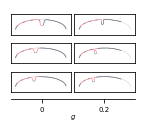

In [8]:
# Average depth
%matplotlib inline
#we will need to do this plot for different values of t_MD

seed = 100
np.random.seed(seed) # 

K = 1e-4 #np.unique(df_mean_shape["K"])[0]
MD_color = '#FF6978'
CF_color = '#2CF6B3'
blastoderm_color = "#373f51"
lw = 0.6


gs = [0,0.2]
col_vals = gs

figsize = (4.5*cm_, 4*cm_)
nrows,ncols = 3,2
fig,axs = plt.subplots(nrows,ncols,figsize = figsize)
xticks = []#[0,1]
xticklabels = None#[str(x) for x in xticks]
yticks = []
yticklabels = None#[str(x) for x in yticks]
xlim = (-1.2,1.2)
ylim = (-0.2, 0.6)


#int_curvature_CF = 2
#t_MD = 0
query_str = "K == @K and germ_band_push == @g"
for i in range(len(gs)):
    g = gs[i]
    path = np.random.choice(allSims_at_maxBendEnergy_CFM.query(query_str).path)
    single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy_CFM.query("path == @path")
    ax = axs[0,i]
    ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, lw = lw, xlim = xlim, ylim = ylim)

t_MD = 0
int_curvature_CF = 2.0
query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
for i in range(len(gs)):
    g = gs[i]
    path = np.random.choice(allSims_at_maxBendEnergy.query(query_str).path)
    single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy.query("path == @path")
    ax = axs[1,i]
    ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, lw = lw, xlim = xlim, ylim = ylim)

t_MD = 5
int_curvature_CF = 2.0
query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
for i in range(len(gs)):
    g = gs[i]
    path = np.random.choice(allSims_at_maxBendEnergy.query(query_str).path)
    single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy.query("path == @path")
    ax = axs[2,i]
    ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, lw = lw, xlim = xlim, ylim = ylim)

    
    
#customizing outer axis
main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
main_ax.set_facecolor('none')

# Hide the right and top spines
main_ax.spines['right'].set_visible(False)
main_ax.spines['top'].set_visible(False)
main_ax.spines['left'].set_visible(False) #set_position(('axes', -0.08))
main_ax.spines['bottom'].set_position(('axes',  0))
plt.xlabel(r'$g$', fontsize = Medium_font_size, labelpad = Small_font_size/10)
plt.xlim(-0.5,ncols -0.5)
plt.ylim(-0.5, nrows -0.5)
tick_intervals_x = col_vals
tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = Medium_font_size)
plt.yticks([])

fig.tight_layout(pad = 0)
fig.savefig("plots/WT_CFM_t_MD_representative_curves.pdf",bbox_inches = "tight")


# Compare the depth along the curve for different Kcf


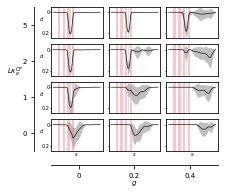

In [48]:
# Average depth
%matplotlib inline
#we will need to do this plot for different values of t_MD

K = 1e-4 #np.unique(df_mean_shape["K"])[0]
MD_color = '#FF6978'
CF_color = '#2CF6B3'
blastoderm_color = '"#373f51"'

t_MDs = [0,5]
t_MD = 0
#int_curvature_CF = 2
gs = [0,0.2,0.4]
col_vals = gs

figsize = (8.25*cm_, 7*cm_)
nrows,ncols = 4,3
fig,axs = plt.subplots(nrows,ncols,figsize = figsize)
xticks = []#[0,1]
xticklabels = None#[str(x) for x in xticks]
yticks = [0,0.2]
yticklabels = [str(x) for x in yticks]
ylim = (0.25, -0.05)
lw = 0.6
xlabel = r"$s$"
ylabel = r"$d$"


#int_curvature_CF = 2
#t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    if i>0: 
        yticklabels_temp = []#[str(x) for x in yticks_temp]
        ylabel_temp = None
    else:
        yticklabels_temp = yticklabels
        ylabel_temp = ylabel
    query_str = "K == @K and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy_CFM.query(query_str)
    ax = axs[3,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels_temp,
                               xlabel = xlabel, ylabel = ylabel_temp, plotCF = False,
                              )
int_curvature_CF = 1
xlabel = None
t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    if i>0: 
        yticklabels_temp = []#[str(x) for x in yticks_temp]
        ylabel_temp = None
    else:
        yticklabels_temp = yticklabels
        ylabel_temp = ylabel
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[2,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels_temp,
                               xlabel = xlabel, ylabel = ylabel_temp, plotCF = True,
                              )

int_curvature_CF = 2
t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    if i>0: 
        yticklabels_temp = []#[str(x) for x in yticks_temp]
        ylabel_temp = None
    else:
        yticklabels_temp = yticklabels
        ylabel_temp = ylabel
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[1,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels_temp,
                               xlabel = xlabel, ylabel = ylabel_temp, plotCF = True,
                              )
int_curvature_CF = 5.0
t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    if i>0: 
        yticklabels_temp = []#[str(x) for x in yticks_temp]
        ylabel_temp = None
    else:
        yticklabels_temp = yticklabels
        ylabel_temp = ylabel
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[0,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels_temp,
                               xlabel = xlabel, ylabel = ylabel_temp, plotCF = True,
                              )
    
    
#customizing outer axis
main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
main_ax.set_facecolor('none')

# Hide the right and top spines
main_ax.spines['right'].set_visible(False)
main_ax.spines['top'].set_visible(False)
main_ax.spines['left'].set_position(('axes', -0.1))
main_ax.spines['bottom'].set_position(('axes',  -0.1))
#ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
#ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# Only show ticks on the left and bottom spines
#main_ax.yaxis.set_ticks_position('left')
#main_ax.xaxis.set_ticks_position('bottom')

#plt.xlabel('slope', fontsize = 60, labelpad = 80)
#plt.xlabel(cols_param, fontsize = 40, labelpad = 30)
plt.xlabel(r'$g$', fontsize = Medium_font_size, labelpad = Small_font_size/10)
plt.ylabel(r'$L\kappa_o^{CF}$', fontsize = Medium_font_size, labelpad = Medium_font_size, rotation = 0)
#plt.ylabel('thickness', fontsize = 60, labelpad = 80)

plt.xlim(-0.5,ncols -0.5)
plt.ylim(-0.5, nrows -0.5)


#tick_intervals_x = [round(x,2) for x in col_vals]
tick_intervals_x = col_vals
tick_intervals_y = [0,1,2,5] #[round(x,2) for x in row_vals]

#tick_intervals_x_str = [str(round(x,3)) for x in col_vals]
#tick_intervals_x_str = ['%.1E' % Decimal(str(x)) for x in col_vals]
tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = [str(x) for x in tick_intervals_y]
#tick_intervals_y_str = [str(round(x,2)) for x in tick_intervals_y]

plt.xticks(range(ncols), tick_intervals_x_str, fontsize = Medium_font_size)
plt.yticks(range(nrows), tick_intervals_y_str, fontsize = Medium_font_size)
#plt.yticks(tick_intervals_x, [r'$8.5 \times 10^{-5}$', r'$1 \times 10^{-4}$', r'$1.15 \times 10^{-4}$'], fontsize = 16)
#plt.yticks(range(len(row_vals)), tick_intervals_y_str, fontsize = Medium_font_size)

#main_ax.tick_p arams(axis=u'both', which=u'both',length=10)
 
#adding padding between subplots
fig.tight_layout(pad = 0.5) 

os.makedirs("plots/", exist_ok = True)
fig.savefig("plots/WT_different_KCF_depth_comparison.pdf", bbox_inches = "tight")

# Plot representative curves

In [7]:
def helper_plot_tissue(ax, df_timepoint, alpha = 1, lw = 1, plot_vit = True, label = None, title = None,
                       xlim = None, ylim = None,
                      ):
    

    #plot segments
    points_1 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[:-1]
    points_2 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[1:]
    #create a collection of lines
    segments_demo = np.concatenate([points_1, points_2], axis = 1)
    #value by which to color lines
    #dydx = df_timepoint["d_r_mod"][:-1]/df_timepoint["dr0"][:-1]
    colors = np.where(df_timepoint["mitotic_domain_id"] == -1, blastoderm_color, MD_color)
    colors = np.where(df_timepoint["ko"] != 0, CF_color, colors)
    #make line collection
    #lc = LineCollection(segments_demo, array = dydx,cmap=cmap, norm=norm,alpha = alpha,lw = lw,)
    lc = LineCollection(segments_demo, colors =colors,alpha = alpha,linewidths=lw, label = label)
    line = ax.add_collection(lc)
    
    if plot_vit:
        thetas = np.linspace(0, np.pi, 1000)
        vit_x = np.cos(thetas)
        vit_y = 0.4*np.sin(thetas)
        ax.plot(1.02*vit_x, 1.02*vit_y, lw = lw, alpha = 1, color = "#d7d8dc", zorder = 0)
    
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None: ax.set_title(title, fontsize = Medium_font_size)
        
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)    
        

    return(ax)


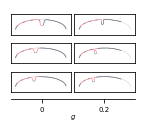

In [8]:
# Average depth
%matplotlib inline
#we will need to do this plot for different values of t_MD

seed = 100
np.random.seed(seed) # 

K = 1e-4 #np.unique(df_mean_shape["K"])[0]
MD_color = '#FF6978'
CF_color = '#2CF6B3'
blastoderm_color = "#373f51"
lw = 0.6


gs = [0,0.2]
col_vals = gs

figsize = (4.5*cm_, 4*cm_)
nrows,ncols = 3,2
fig,axs = plt.subplots(nrows,ncols,figsize = figsize)
xticks = []#[0,1]
xticklabels = None#[str(x) for x in xticks]
yticks = []
yticklabels = None#[str(x) for x in yticks]
xlim = (-1.2,1.2)
ylim = (-0.2, 0.6)


#int_curvature_CF = 2
#t_MD = 0
query_str = "K == @K and germ_band_push == @g"
for i in range(len(gs)):
    g = gs[i]
    path = np.random.choice(allSims_at_maxBendEnergy_CFM.query(query_str).path)
    single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy_CFM.query("path == @path")
    ax = axs[0,i]
    ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, lw = lw, xlim = xlim, ylim = ylim)

t_MD = 0
int_curvature_CF = 2.0
query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
for i in range(len(gs)):
    g = gs[i]
    path = np.random.choice(allSims_at_maxBendEnergy.query(query_str).path)
    single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy.query("path == @path")
    ax = axs[1,i]
    ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, lw = lw, xlim = xlim, ylim = ylim)

t_MD = 5
int_curvature_CF = 2.0
query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
for i in range(len(gs)):
    g = gs[i]
    path = np.random.choice(allSims_at_maxBendEnergy.query(query_str).path)
    single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy.query("path == @path")
    ax = axs[2,i]
    ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, lw = lw, xlim = xlim, ylim = ylim)

    
    
#customizing outer axis
main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
main_ax.set_facecolor('none')

# Hide the right and top spines
main_ax.spines['right'].set_visible(False)
main_ax.spines['top'].set_visible(False)
main_ax.spines['left'].set_visible(False) #set_position(('axes', -0.08))
main_ax.spines['bottom'].set_position(('axes',  0))
plt.xlabel(r'$g$', fontsize = Medium_font_size, labelpad = Small_font_size/10)
plt.xlim(-0.5,ncols -0.5)
plt.ylim(-0.5, nrows -0.5)
tick_intervals_x = col_vals
tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = Medium_font_size)
plt.yticks([])

fig.tight_layout(pad = 0)
fig.savefig("plots/WT_CFM_t_MD_representative_curves.pdf",bbox_inches = "tight")


In [9]:
allSims_at_maxBendEnergy

,ID,mitotic_domain,mitotic_domain_id,dr0,K,L+1,L-1,ko,arclength,arclength_frac,...,int_curvature_CF,seed,germ_band_push,noise_scale,dt,t_final,add_CF_bool,t_CF,t_MD,path
0,0,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,0.000000,0.000000,...,1.0,279.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_1.0_seed_279_germ_ba...
1,1,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,0.014959,0.010101,...,1.0,279.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_1.0_seed_279_germ_ba...
2,2,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,0.029917,0.020202,...,1.0,279.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_1.0_seed_279_germ_ba...
3,3,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,0.044876,0.030303,...,1.0,279.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_1.0_seed_279_germ_ba...
4,4,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,0.059834,0.040404,...,1.0,279.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_1.0_seed_279_germ_ba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76795,115,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,1.421060,0.959596,...,5.0,509.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_5.0_seed_509_germ_ba...
76796,116,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,1.436018,0.969697,...,5.0,509.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_5.0_seed_509_germ_ba...
76797,117,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,1.450977,0.979798,...,5.0,509.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_5.0_seed_509_germ_ba...
76798,118,0.0,-1.0,0.023013,0.0001,1.0,1.0,0.0,1.465935,0.989899,...,5.0,509.0,0.35,0.00001,0.00001,1000.0,1.0,0.0,0.0,K_0.0001_int_curvature_CF_5.0_seed_509_germ_ba...


In [10]:

int_curvature_CF = 2
t_MD = 0
for i in range(len(gs)):
    g = gs[i]
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[1,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels,
                               xlabel = xlabel, ylabel = ylabel, plotCF = True,
                              )
    
int_curvature_CF = 2
t_MD = 5
for i in range(len(gs)):
    g = gs[i]
    query_str = "K == @K and t_MD == @t_MD and int_curvature_CF == @int_curvature_CF and germ_band_push == @g"
    df_filtered = mean_shape_at_maxBendEnergy.query(query_str)
    ax = axs[2,i]
    ax = helper_plot_avg_depth(ax, df_filtered, xname = "arclength_frac", 
                               yname = "dist_to_ellipse", yname_std = "dist_to_ellipse_std",
                               ylim = ylim, lw = lw,
                               xticks = xticks, xticklabels=xticklabels, yticks = yticks, yticklabels=yticklabels,
                               xlabel = xlabel, ylabel = ylabel, plotCF = True
                              )
    

In [11]:
seed = 100 #10000 is fine #100 is quite good
np.random.seed(seed)
path = np.random.choice(grouped_df.query("nb_folds_at_maxBendEnergy == 1")["path"])
print(path)
t_at_maxBendEnergy = grouped_df.query("path == @path").t_at_maxBendEnergy.values[0]
t_at_final = 1000 #grouped_df.query("path == @path").t_at_final.values[0]
germ_band_push = grouped_df.query("path == @path").germ_band_push.values[0]
K = grouped_df.query("path == @path").K.values[0]
single_sim_energy = df_energy_all.query("path == @path")
single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy.query("path == @path")
single_sim_at_final = allSims_at_final.query("path == @path")

figsize = (10*cm_, 12*cm_)
#title = r"$K_b^{*} = $" + str(K) + " g"
set_xscale_log = True
if set_xscale_log: 
    xticks = [1, t_at_maxBendEnergy, 1000]
    xticklabels = ['0', str(np.round(np.log10(t_at_maxBendEnergy),1)), '3']
    xlabel = r"$t$"+ " (log10)"
else:
    xticks = [0,1000]
    xticklabels = [str(x) for x in xticks]
    xlabel = r"$t$"

fig, axd = plt.subplot_mosaic([['top','top', 'top'],
                               ['center left', 'center center', 'center right'],
                               ['lower left', 'lower center', 'lower right']
                              ],
                              figsize=figsize, )

####
# Plotting shape
####

ax = axd["top"]
ax = helper_plot_tissue(ax, single_sim_at_final, alpha = 0.5, lw = 2, plot_vit = False, label = f"t = 1000")
ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, alpha = 1, lw = 2, label = f"t = {int(t_at_maxBendEnergy)}")
ax.legend(fontsize = Medium_font_size, loc = "lower right")


UndefinedVariableError: name 'nb_folds_at_maxBendEnergy' is not defined